In [3]:
import numpy as np                 
import pandas as pd                
import matplotlib                  
import matplotlib.pyplot as plt      
import seaborn as sns                          
%matplotlib inline

In [4]:
dataset = pd.read_csv("21-DataA.csv")
dataset.head()

,Id,Membership Type,Age,Weight,Height,Gender,Life_Style,BMI,Weight Class,Calories
0,1,Monthly,50,44.274100,1.746852,Male,Active,14.509008,Underweight,14.509008
1,2,Monthly,39,67.064166,1.703409,Female,Low Active,23.112811,Normal,23.112811
2,3,Monthly,43,27.340908,2.018806,Male,Sedentary,6.708474,Underweight,6.708474
3,4,Monthly,29,68.625312,2.071397,Male,Low Active,15.994023,Underweight,15.994023
4,5,Annually,22,76.853198,1.325519,Male,Low Active,43.741128,Obesity,43.741128


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Calories'}>]], dtype=object)

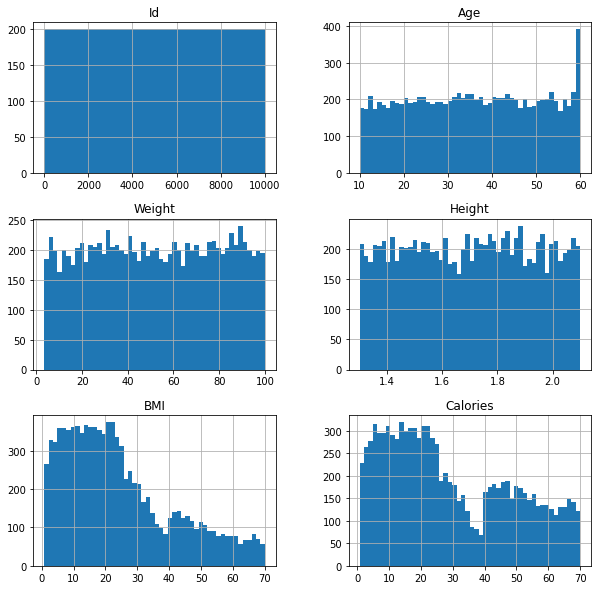

In [5]:
dataset.hist(bins=50, figsize=(10, 10))

# Describing the dataset

## Overall description

In [6]:
dataset.describe()

,Id,Age,Weight,Height,BMI,Calories
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.206800,52.109158,1.701217,24.545251,29.450834
std,2886.89568,14.577856,27.867158,0.230416,17.194997,19.627600
min,1.00000,10.000000,3.424272,1.300066,0.790844,0.790844
25%,2500.75000,23.000000,28.163806,1.501838,11.117185,12.970761
50%,5000.50000,35.000000,52.033691,1.705572,20.777913,24.497247
75%,7500.25000,48.000000,76.612429,1.895301,34.018587,46.140570
max,10000.00000,60.000000,99.984035,2.099839,69.996543,69.998040


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  int64  
 1   Membership Type  10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Weight           10000 non-null  float64
 4   Height           10000 non-null  float64
 5   Gender           10000 non-null  object 
 6   Life_Style       10000 non-null  object 
 7   BMI              10000 non-null  float64
 8   Weight Class     10000 non-null  object 
 9   Calories         10000 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 781.4+ KB


## Column-wise description

In [8]:
for i in dataset.columns:
    print(i + ":")
    print(f"Datatype : {type(dataset[i])}")
    print(dataset[i].describe())
    print("-"*100)
    print("")

Id:
Datatype : <class 'pandas.core.series.Series'>
count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: Id, dtype: float64
----------------------------------------------------------------------------------------------------

Membership Type:
Datatype : <class 'pandas.core.series.Series'>
count       10000
unique          2
top       Monthly
freq         5031
Name: Membership Type, dtype: object
----------------------------------------------------------------------------------------------------

Age:
Datatype : <class 'pandas.core.series.Series'>
count    10000.000000
mean        35.206800
std         14.577856
min         10.000000
25%         23.000000
50%         35.000000
75%         48.000000
max         60.000000
Name: Age, dtype: float64
----------------------------------------------------------------------------------------------------

Weight:
Datatype : <cla

## Domains of values

In [9]:
for i in dataset.columns:
    print(f"{i} : ({dataset[i].min()}, {dataset[i].max()})")
    print("")

Id : (1, 10000)

Membership Type : (Annually, Monthly)

Age : (10, 60)

Weight : (3.424272120170486, 99.98403498593984)

Height : (1.30006645801946, 2.099838680525526)

Gender : (Female, Male)

Life_Style : (Active, Sedentary)

BMI : (0.790844212549507, 69.996543)

Weight Class : (Normal, Underweight)

Calories : (0.790844212549507, 69.99804)



## Finding Anomalies and Pattern in each column

In [10]:
columns = dataset.columns
columns

Index(['Id', 'Membership Type', 'Age', 'Weight', 'Height', 'Gender',
       'Life_Style', 'BMI', 'Weight Class', 'Calories'],
      dtype='object')

### Membership Type

In [11]:
membership = dataset["Membership Type"]
membership.head()

0     Monthly
1     Monthly
2     Monthly
3     Monthly
4    Annually
Name: Membership Type, dtype: object

<AxesSubplot:xlabel='Membership Type', ylabel='count'>

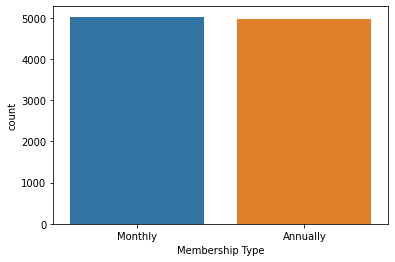

In [12]:
sns.countplot(data=membership, x=membership)

Evenly Distributed Data between "Monthly" and "Annually" column

### Age

In [13]:
age = dataset.Age
age.head()

0    50
1    39
2    43
3    29
4    22
Name: Age, dtype: int64

Text(0.5, 1.0, 'Scatterplot of the Age column')

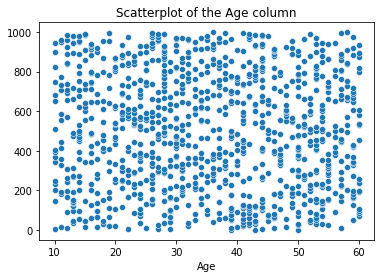

In [14]:
sns.scatterplot(data=age, x=age[:1000], y=range(1000))
plt.title("Scatterplot of the Age column")

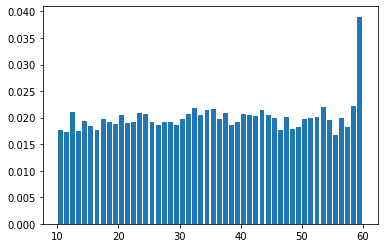

In [15]:
plt.hist(age, bins=50, density=True, rwidth=0.8)
plt.show()

Histogram plot of the column and we can see the number of instance for 60 is very high

#### Anomaly Detection

In [16]:
# using Median Absolute Deviation
median = np.median(age)
new_values_of_age = []
for i in age:
    new_values_of_age.append(abs(i-median))
new_values_of_age = np.array(new_values_of_age)
Median_Absolute_Deviation = np.median(new_values_of_age)

In [17]:
median, Median_Absolute_Deviation

(35.0, 12.0)

In [18]:
lower_limit = median - 2.5*Median_Absolute_Deviation
upper_limit = median + 2.5*Median_Absolute_Deviation
lower_limit, upper_limit

(5.0, 65.0)

In [19]:
outlier = age[(age>upper_limit)|(age<lower_limit)]
outlier

Series([], Name: Age, dtype: int64)

Text(0.5, 1.0, 'Boxplot for age')

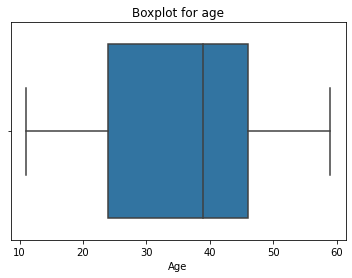

In [61]:
sns.boxplot(data=age, x=age) 
plt.title("Boxplot for age")

By two methods of anomaly detection no outliers found

### Weight

In [22]:
weight = dataset.Weight
weight.head()

0    44.274100
1    67.064166
2    27.340908
3    68.625312
4    76.853198
Name: Weight, dtype: float64

<AxesSubplot:xlabel='Weight'>

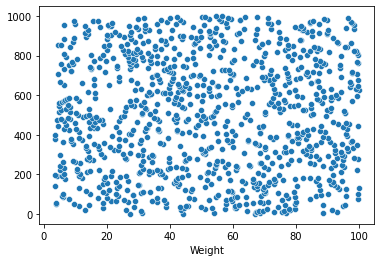

In [23]:
sns.scatterplot(data=weight, x=weight[:1000], y=range(1000))

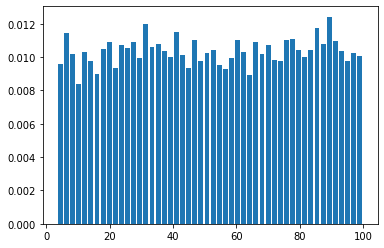

In [24]:
plt.hist(weight, bins=50, density=True, rwidth=0.8)
plt.show()

Evenly Distributed Data

#### Anomaly detection

In [25]:
# using IQR method
Q1 = weight.quantile(0.2)
Q3 = weight.quantile(0.8)
IQR = Q3-Q1
Q1, Q3, IQR

(23.55721849553432, 81.32423477214093, 57.76701627660661)

In [26]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(-63.093305919375595, 167.97475918705084)

In [27]:
outliers = weight[(weight>upper)|(weight<lower)]
outliers

Series([], Name: Weight, dtype: float64)

Text(0.5, 1.0, 'boxplot for Weight/')

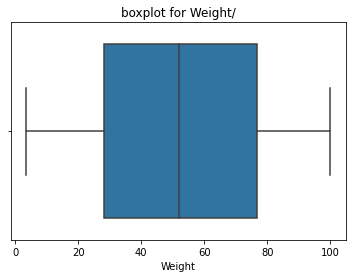

In [62]:
# No anomaly detected
sns.boxplot(data=weight, x=weight)
plt.title("boxplot for Weight/")

### Height

In [29]:
height = dataset.Height
height.head()

0    1.746852
1    1.703409
2    2.018806
3    2.071397
4    1.325519
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height'>

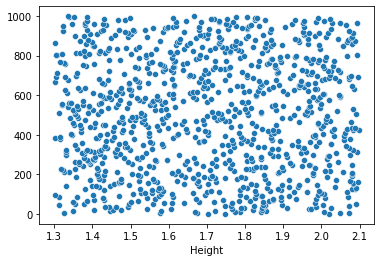

In [30]:
sns.scatterplot(data=height, x=height[:1000], y=range(1000))

<AxesSubplot:>

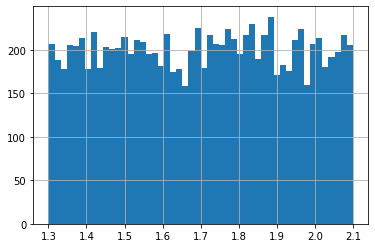

In [31]:
height.hist(bins=50)

Evenly distributed data with zero anomaly(by visual)

### Anomaly detection

Text(0.5, 1.0, 'No Anomaly Detected')

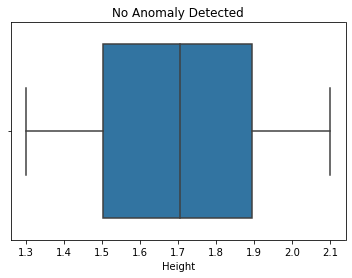

In [32]:
sns.boxplot(data=height, x=height)
plt.title("No Anomaly Detected")

### Gender

In [33]:
gender = dataset.Gender
gender.head()

0      Male
1    Female
2      Male
3      Male
4      Male
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

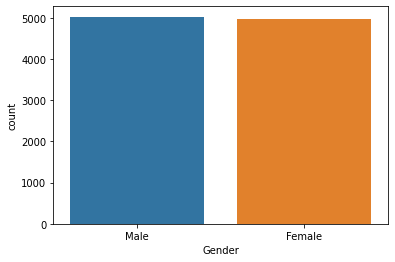

In [34]:
sns.countplot(data=gender, x=gender)

Number of instances for male = number of instances for female

### Life Style

In [35]:
life_style = dataset.Life_Style
life_style.head()

0        Active
1    Low Active
2     Sedentary
3    Low Active
4    Low Active
Name: Life_Style, dtype: object

Text(0.5, 1.0, 'Life Style ')

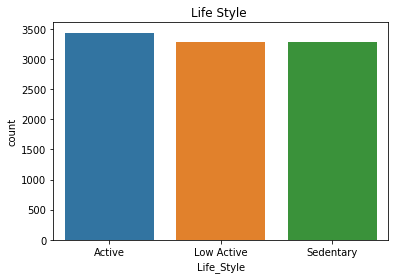

In [63]:
sns.countplot(data=life_style, x=life_style)
plt.title("Life Style ")

### BMI

In [37]:
bmi = dataset.BMI
bmi.head()

0    14.509008
1    23.112811
2     6.708474
3    15.994023
4    43.741128
Name: BMI, dtype: float64

In [38]:
# bmi_formula = weight/(height)**2
calBMI = []
for i in range(10000):
    calBMI.append(weight[i]/(height[i])**2)
calculated_bmi = np.array(calBMI)

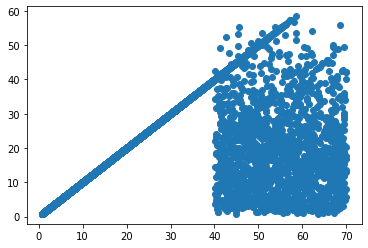

In [39]:
plt.scatter(bmi, calculated_bmi)

we can clearly see the data errors

Expected graph : Linear 

Actual Graph: Linear + Noise

Mathematical Description:

bmi = weight/height^2

#### Anomaly detection

In [40]:
# Using Inter Quartile Range
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
Q1, Q3, IQR, lower, upper

(11.117185082687195,
 34.018587112681786,
 22.901402029994593,
 -23.2349179623047,
 68.37069015767368)

In [41]:
outliers = bmi[(bmi>upper)|(bmi<lower)]
len(outliers)                 #73 outliers detected

73

Text(0.5, 1.0, 'Boxplot detected anomaly in the column')

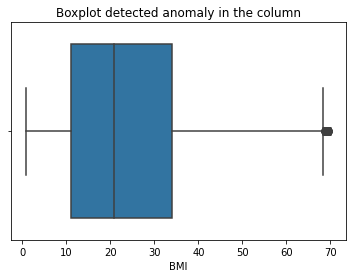

In [64]:
sns.boxplot(data=bmi, x=bmi)
plt.title("Boxplot detected anomaly in the column")

In [43]:
# given values of bmi are note equal to calculated value 
data_error = []
for i in range(10000):
    diff = calculated_bmi[i]-bmi[i]
    if diff!=0:
        data_error.append(bmi[i])

len(data_error)      #5124 instances of BMI is wrongly calculated  

5124

Given values of bmi are note equal to calculated value.

5124 instances of BMI is wrongly calculated.

### Weight class

In [44]:
weight_class = dataset["Weight Class"]
weight_class.head()

0    Underweight
1         Normal
2    Underweight
3    Underweight
4        Obesity
Name: Weight Class, dtype: object

Text(0.5, 1.0, 'Actual Data')

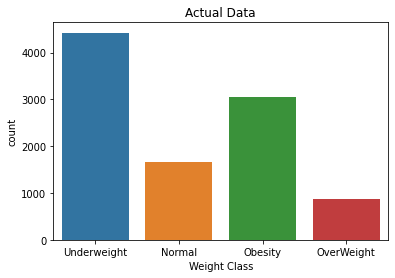

In [65]:
sns.countplot(data=weight_class, x=weight_class)
plt.title("Actual Data")

In [46]:
#due to data errors in BMI calculation we have the data error in weight class
cal_Weight_class = []
for i in calculated_bmi:
    if i<18.5:
        cal_Weight_class.append("Underweight")
    elif i>=18.5 and i<=24.9:
        cal_Weight_class.append("Normal")
    elif i>24.9 and i<=29.9:
        cal_Weight_class.append("OverWeight")
    else:
        cal_Weight_class.append("Obesity")
calculated_weight_class = np.array(cal_Weight_class)

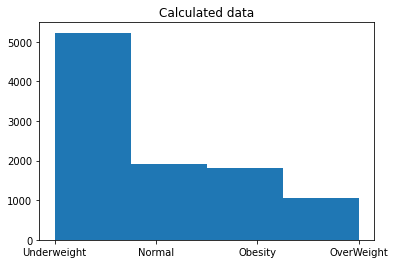

In [66]:
plt.hist(calculated_weight_class, bins=4)
plt.title("Calculated data")
plt.show()

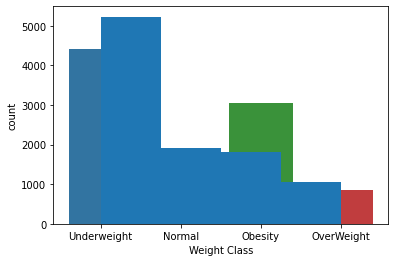

In [48]:
#error
sns.countplot(data=weight_class, x=weight_class)
plt.hist(calculated_weight_class, bins=4)
plt.show()

This is the overlapping histogram graph of Calculated weight_class and Actual weight_class

Mathematical Description:

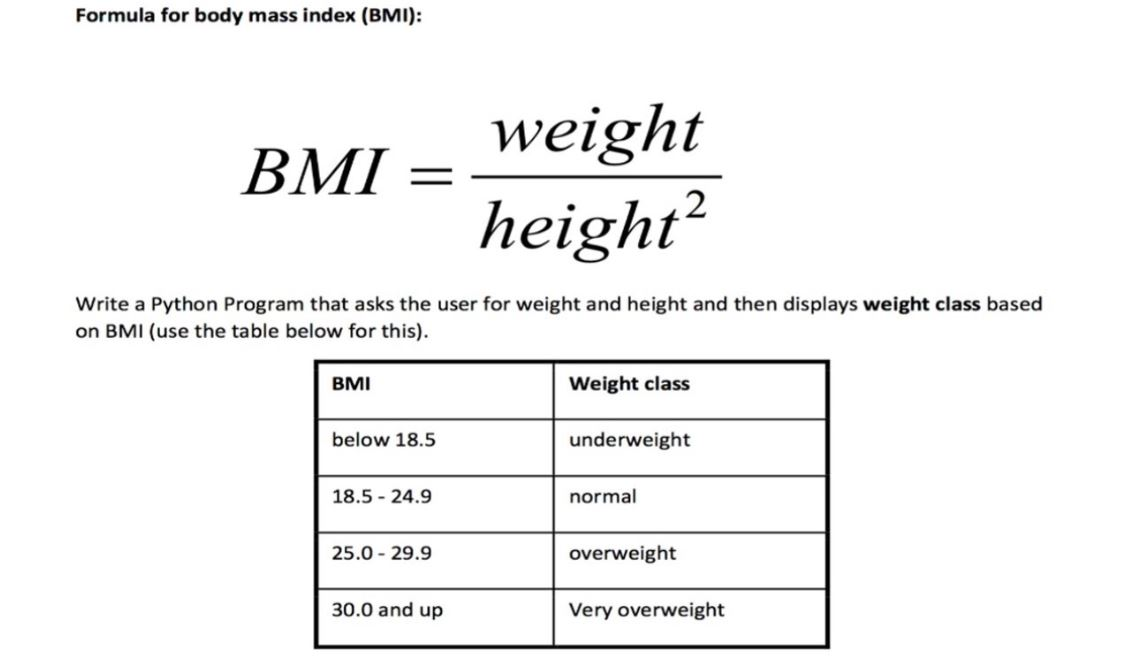

### Calories

In [49]:
calories = dataset.Calories
calories.head()

0    14.509008
1    23.112811
2     6.708474
3    15.994023
4    43.741128
Name: Calories, dtype: float64

<AxesSubplot:>

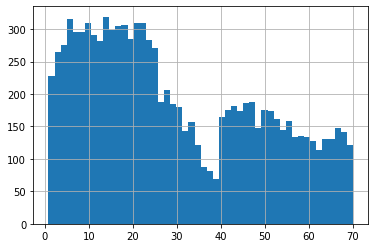

In [50]:
calories.hist(bins=50)      #we can see the almost same graph of BMI and Calories, that means, value errors are there

we can see the almost same graph of BMI and Calories, that means, value errors are there

In [51]:
calculated_calories = [(66.5 + 13.8*weight[i] + 5*height[i]*100)/(6.8*age[i]) for i in range(10000)]

formula to calculate calories 

source : https://www.thejakartapost.com/life/2016/09/27/how-to-calculate-your-ideal-calorie-intake.html

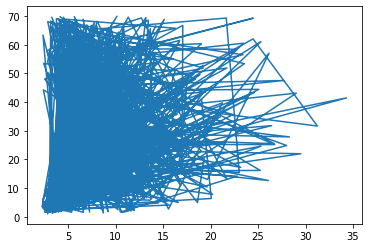

In [52]:
plt.plot(calculated_calories[:1000], calories[:1000])     #expected linear graph

A lot of noise detected in the calculated calories and the Given calories

#### Anomaly Detection

<AxesSubplot:>

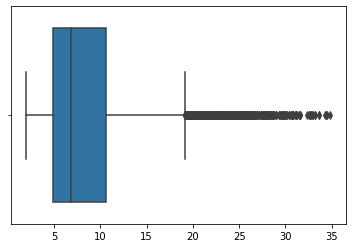

In [53]:
#using boxplot
#for calculated calories
sns.boxplot(x=np.array(calculated_calories))

Boxplot showing a lot of outliers in the Calculated calories

In [54]:
# using Median Absolute Deviation
median = np.median(calories)
new_values_of_cal = []
for i in calories:
    new_values_of_cal.append(abs(i-median))
new_values_of_cal = np.array(new_values_of_cal)
Median_Absolute_Deviation = np.median(new_values_of_cal)
lower_limit = median - 2.5*Median_Absolute_Deviation
upper_limit = median + 2.5*Median_Absolute_Deviation
median, Median_Absolute_Deviation, lower_limit, upper_limit

(24.49724688828173,
 15.366669797974037,
 -13.919427606653365,
 62.913921383216824)

In [55]:
outliers = calories[(calories>upper_limit) | (calories<lower_limit)]
len(outliers)                                      #687 outliers detected using Median Deviation Method

687

<AxesSubplot:xlabel='Calories'>

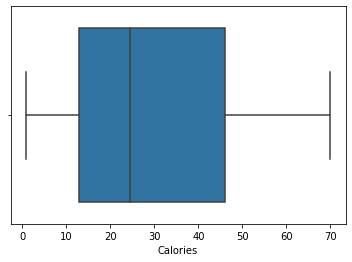

In [56]:
sns.boxplot(x=calories)        

no outlier in actual data but the values might have error.

## Relationship in this dataset

### Pearson

In [57]:
dataset.corr(method="pearson")

,Id,Age,Weight,Height,BMI,Calories
Id,1.000000,0.005976,0.001601,0.001873,-0.010564,-0.002543
Age,0.005976,1.000000,-0.004622,0.008833,-0.016550,-0.005175
Weight,0.001601,-0.004622,1.000000,0.009684,0.495896,0.360087
Height,0.001873,0.008833,0.009684,1.000000,-0.254006,-0.193754
BMI,-0.010564,-0.016550,0.495896,-0.254006,1.000000,0.734520
Calories,-0.002543,-0.005175,0.360087,-0.193754,0.734520,1.000000


1. x=bmi, y=weight
2. x=bmi, y=calories
3. x=calories, y=weight

### Kendall
Kendall's Tau = (C – D / C + D)

In [58]:
dataset.corr(method="kendall")

,Id,Age,Weight,Height,BMI,Calories
Id,1.000000,-0.015437,0.000857,0.001283,-0.003171,-0.000200
Age,-0.015437,1.000000,-0.003201,0.006027,-0.011194,-0.003643
Weight,0.000857,-0.003201,1.000000,0.006337,0.522905,0.370310
Height,0.001283,0.006027,0.006337,1.000000,-0.198953,-0.150288
BMI,-0.003171,-0.011194,0.522905,-0.198953,1.000000,0.744969
Calories,-0.000200,-0.003643,0.370310,-0.150288,0.744969,1.000000


1. C=bmi, D=weight
2. C=bmi, D=calories
3. C=calories, D=weight

### Spearman

In [59]:
dataset.corr(method="spearman")

,Id,Age,Weight,Height,BMI,Calories
Id,1.000000,0.006106,0.001458,0.001822,-0.004667,-0.000194
Age,0.006106,1.000000,-0.004898,0.008920,-0.016943,-0.005820
Weight,0.001458,-0.004898,1.000000,0.009574,0.648629,0.460021
Height,0.001822,0.008920,0.009574,1.000000,-0.285725,-0.215538
BMI,-0.004667,-0.016943,0.648629,-0.285725,1.000000,0.764391
Calories,-0.000194,-0.005820,0.460021,-0.215538,0.764391,1.000000


three methods show the relation between,
1. BMI, Weight, (also height)
2. BMI Calories
3. Calories and weight
